In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /scratch/slurm-job.592212/matplotlib-oxxbf6wq because the default path (/cluster/customapps/biomed/grlab/users/prelotla/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
batch_to_genes_='/cluster/work/grlab/projects/TCGA/PanCanAtlas/immunopepper_paper/peptides_ccell_rerun_gtex_151220/ARCHIV_keep_runs/GTEX2019_commit_v3_TEST_merged3_372a147_medium_run_pya.0.17.1_conf2_annot_ref_chrall_cap/batch_to_gene.txt'

In [3]:
coding_genes_='/cluster/work/grlab/projects/projects2020_OHSU/gene_lists/OHSU_gencodev32_proteincodinggeneids.txt'

In [4]:
processed_genes_ = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/GTEX2019_eth/GTEX2019_c4dd02c_conf2_RFall_ref/genes_17012023.2.txt'

In [5]:
batch_to_genes = pd.read_csv(batch_to_genes_, sep = ',')

In [6]:
batch_to_genes.columns = ['batch', 'gene']

In [7]:
batch_to_genes.head()

,batch,gene
0,0,ENSG00000223972.5
1,1,ENSG00000227232.5
2,2,ENSG00000278267.1
3,3,ENSG00000243485.5
4,4,ENSG00000284332.1


In [8]:
batch_to_genes.shape

(60609, 2)

In [9]:
coding_genes = pd.read_csv(coding_genes_, sep = ',', header = None)
coding_genes.columns = ['gene']
coding_genes['coding'] = 1

In [10]:
coding_genes.head()

,gene,coding
0,ENSG00000137038.8,1
1,ENSG00000143036.17,1
2,ENSG00000161681.15,1
3,ENSG00000188112.9,1
4,ENSG00000170516.17,1


In [11]:
coding_genes.shape

(19697, 2)

In [12]:
processed_genes = pd.read_csv(processed_genes_, sep = ',', header = None)
processed_genes.columns = ['gene']
processed_genes['processed'] = 1

In [13]:
processed_genes.head()

,gene,processed
0,ENSG00000169962.5,1
1,ENSG00000198382.9,1
2,ENSG00000085741.13,1
3,ENSG00000137492.8,1
4,ENSG00000179240.11,1


In [14]:
processed_genes.shape

(18082, 2)

In [15]:
df = batch_to_genes.merge(processed_genes, on = ['gene'], how = 'outer')

df = df.merge(coding_genes, on = ['gene'], how = 'outer')

In [16]:
df.head()

,batch,gene,processed,coding
0,0,ENSG00000223972.5,NaN,NaN
1,1,ENSG00000227232.5,NaN,NaN
2,2,ENSG00000278267.1,NaN,NaN
3,3,ENSG00000243485.5,NaN,NaN
4,4,ENSG00000284332.1,NaN,NaN


In [17]:
df[(df['coding'] == 1) & (df['processed'] == 1)]

,batch,gene,processed,coding
8,8,ENSG00000186092.6,1.0,1.0
27,27,ENSG00000284733.1,1.0,1.0
42,42,ENSG00000284662.1,1.0,1.0
60,60,ENSG00000187634.12,1.0,1.0
61,61,ENSG00000188976.11,1.0,1.0
...,...,...,...,...
60533,60533,ENSG00000185894.8,1.0,1.0
60557,60557,ENSG00000172288.7,1.0,1.0
60598,60598,ENSG00000168939.11_PAR_Y,1.0,1.0
60601,60601,ENSG00000124333.16_PAR_Y,1.0,1.0


In [18]:
missing = df.loc[(df['coding'] == 1) & (df['processed'] != 1), :]

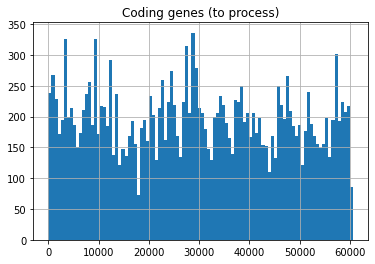

In [19]:
plt.grid(True)
plt.hist(df.loc[(df['coding'] == 1), 'batch'], bins = 100)
plt.title('Coding genes (to process)')
plt.show()

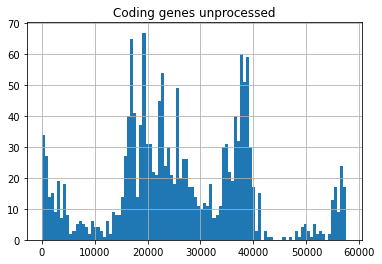

In [20]:
plt.grid(True)
plt.hist(missing['batch'], bins = 100)
plt.title('Coding genes unprocessed')
plt.show()

Do not Kill the 0.. Many genes at the beginning + many genes at the end 
10K: Genes at the beggining and everywhere else
20K: Genes at the beginnning and everywhere else
30K: Genes at the end a lot
40K-45K almost all genes processed 
45K-50K A lot of genes 
50-60K: Genes everywhere


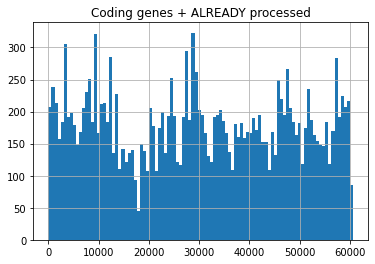

In [21]:
plt.grid(True)
plt.hist(df.loc[(df['coding'] == 1) & (df['processed'] == 1), 'batch'], bins = 100)
plt.title('Coding genes + ALREADY processed')
plt.show()